In [1]:
#import sys
#sys.path.append('/Users/huangxingyue/Desktop/NYU MFE/12 Capstone')
import numpy as np
import pandas as pd
import math
from Pricing.MC_simulation import *
from Fitter.fitter import Fitter
from Pricing.BS import *
from matplotlib import pyplot as plt

In [2]:
fitter=Fitter('market_data.xlsx')
results_hagan=fitter.calibration() #Hagan lognormal implementation
results_obloj=fitter.calibration(method='Obloj') #Obloj implementation
ivols_hagan=fitter.ivol_SABR(results_hagan['alpha'],results_hagan['beta'],results_hagan['rho'],results_hagan['nu'])
ivols_obloj=fitter.ivol_SABR(results_obloj['alpha'],results_obloj['beta'],results_obloj['rho'],results_obloj['nu'])
params_hagan=results_hagan['params']
params_obloj=results_obloj['params']

/Users/huangxingyue/Desktop/NYU MFE/12 Capstone/Pricing/SABR.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  sigma=nu*logFK/math.log((math.sqrt(1-2*rho*z+z*z)+z-rho)/(1-rho))


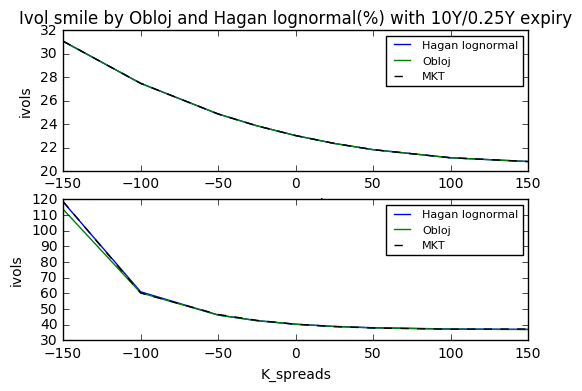

In [3]:
hagan=ivols_hagan.iloc[13,3:].values
obloj=ivols_obloj.iloc[13,3:].values
mkt=fitter.MKT[13]

plt.figure(1)
plt.subplot(211)
plt.plot(fitter.K_spread,[item*100 for item in hagan],label='Hagan lognormal')
plt.plot(fitter.K_spread,[item*100 for item in obloj],label='Obloj')
plt.plot(fitter.K_spread,[item*100 for item in mkt],linestyle='--',color='black',label='MKT') 

plt.title('Ivol smile by Obloj and Hagan lognormal(%) with 10Y/0.25Y expiry')
plt.xlabel('K_spreads')
plt.ylabel('ivols')
plt.legend(prop={'size': 8})

plt.subplot(212)
hagan=ivols_hagan.iloc[7,3:].values
obloj=ivols_obloj.iloc[7,3:].values
mkt=fitter.MKT[7]
plt.plot(fitter.K_spread,[item*100 for item in hagan],label='Hagan lognormal')
plt.plot(fitter.K_spread,[item*100 for item in obloj],label='Obloj')
plt.plot(fitter.K_spread,[item*100 for item in mkt],linestyle='--',color='black',label='MKT') 
plt.xlabel('K_spreads')
plt.ylabel('ivols')
plt.legend(prop={'size': 8})
plt.show()